In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score  
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(dataset.shape)

(200, 5)


In [4]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
dataset = dataset.dropna()

In [7]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
print(dataset.shape)

(200, 5)


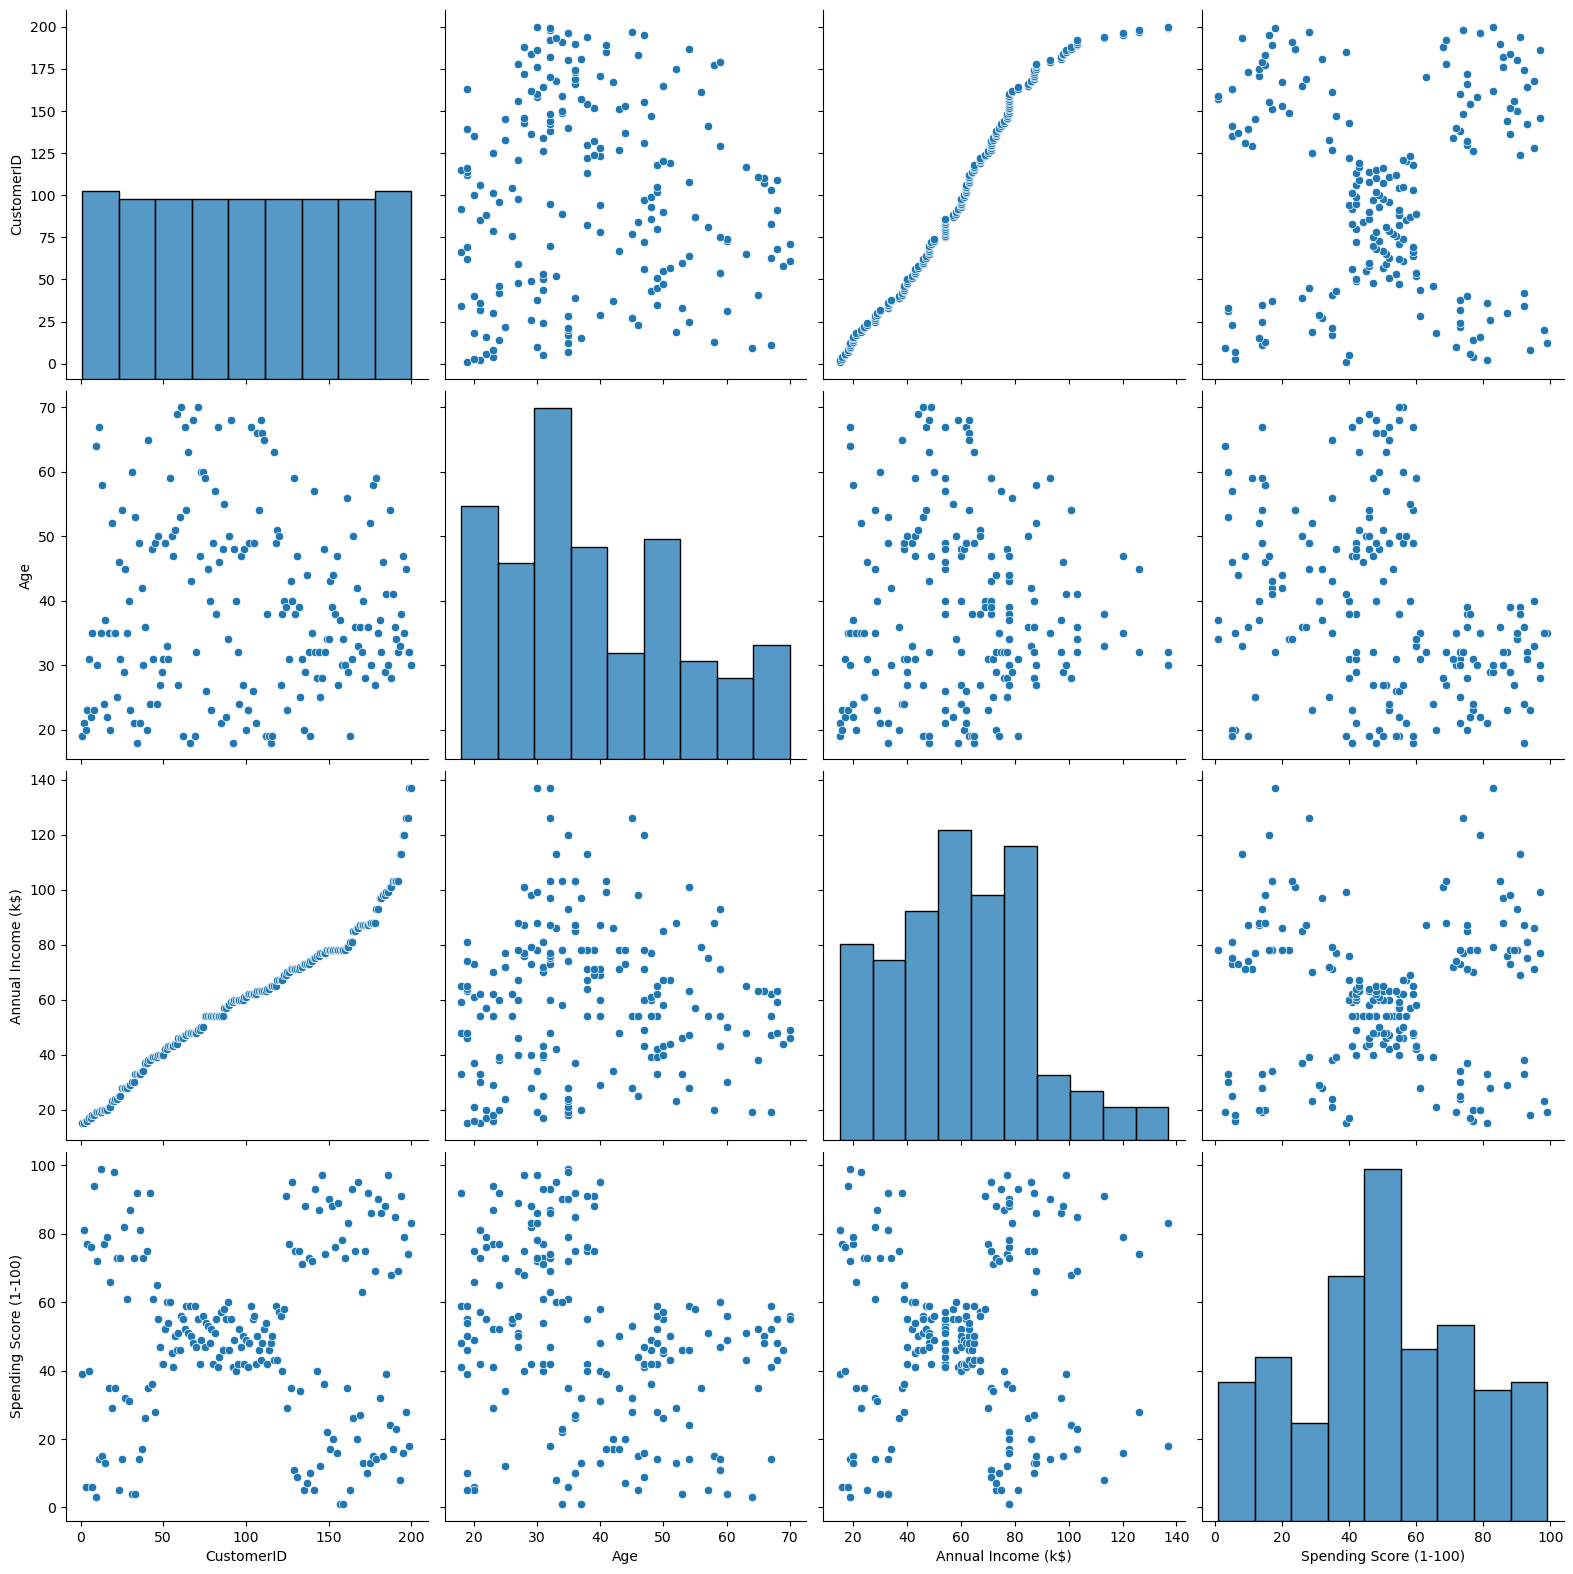

In [10]:
sns.pairplot(dataset, size=4, kind='scatter')
plt.show()

In [11]:
dataset = dataset.drop(columns=['Gender'])
print(dataset.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40


In [12]:
corr_matrix = dataset.corr()
print(corr_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


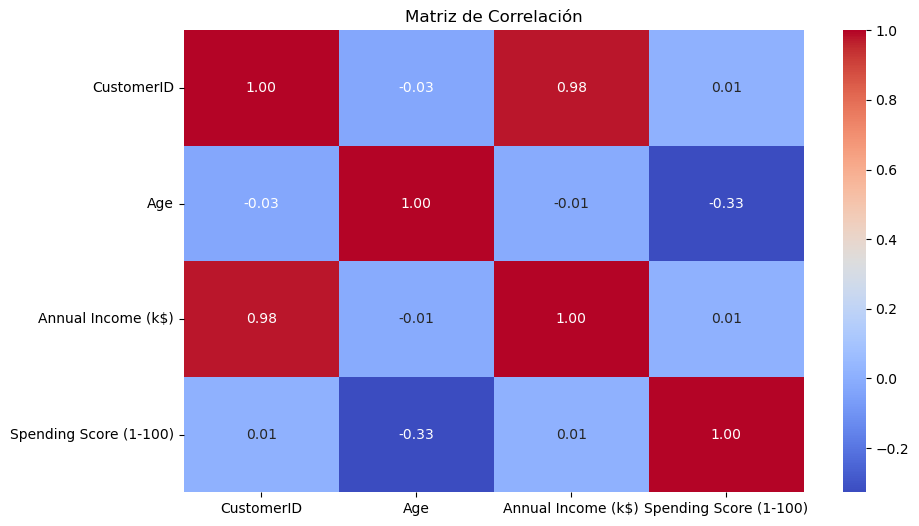

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

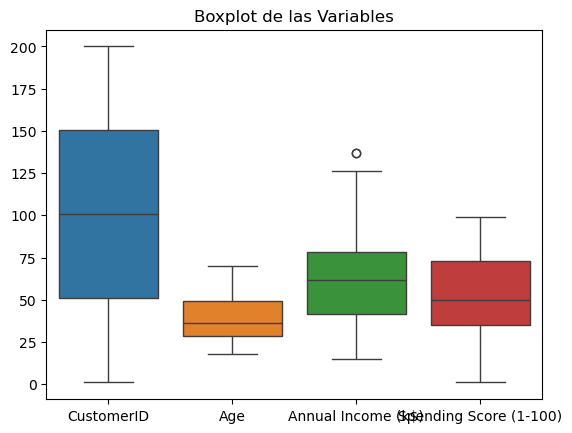

In [14]:
sns.boxplot(data=dataset)
plt.title('Boxplot de las Variables')
plt.show()

In [15]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

In [16]:
dataset_filtered = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Número de filas originales: {dataset.shape[0]}')
print(f'Número de filas después de eliminar valores atípicos: {dataset_filtered.shape[0]}')

Número de filas originales: 200
Número de filas después de eliminar valores atípicos: 198


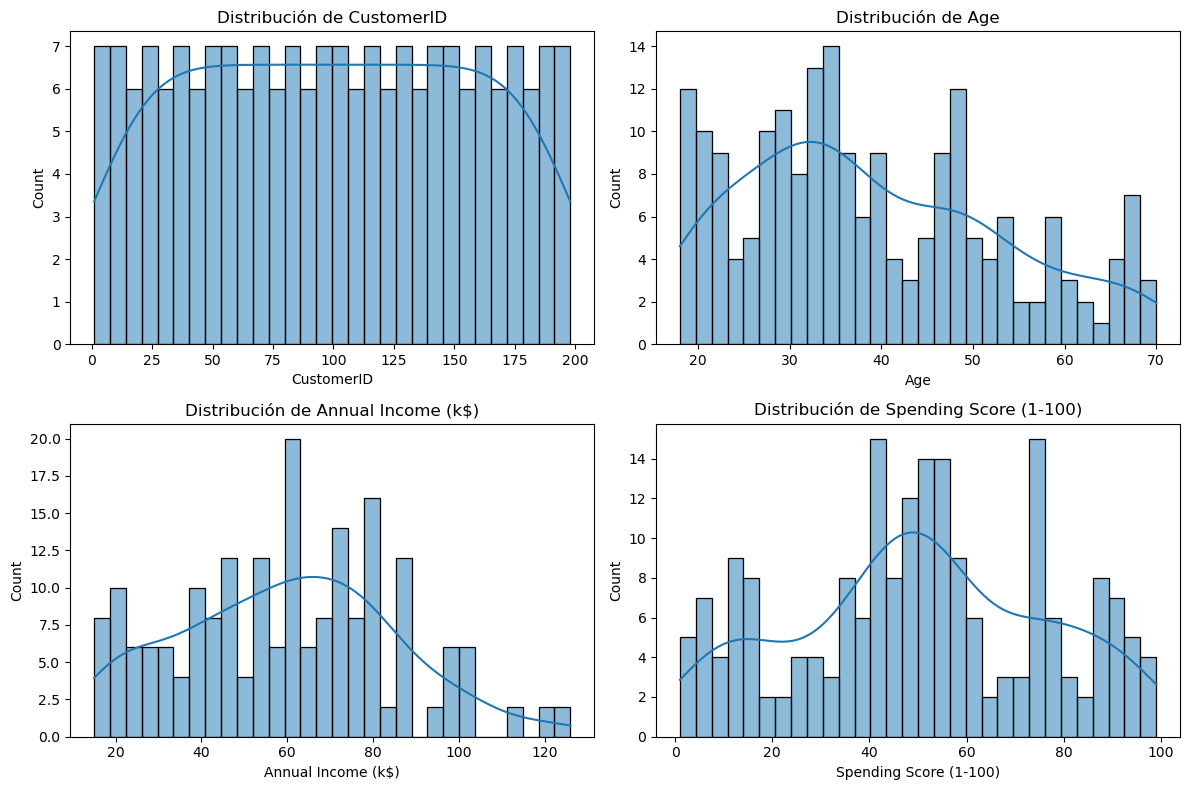

In [17]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(dataset_filtered.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(dataset_filtered[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

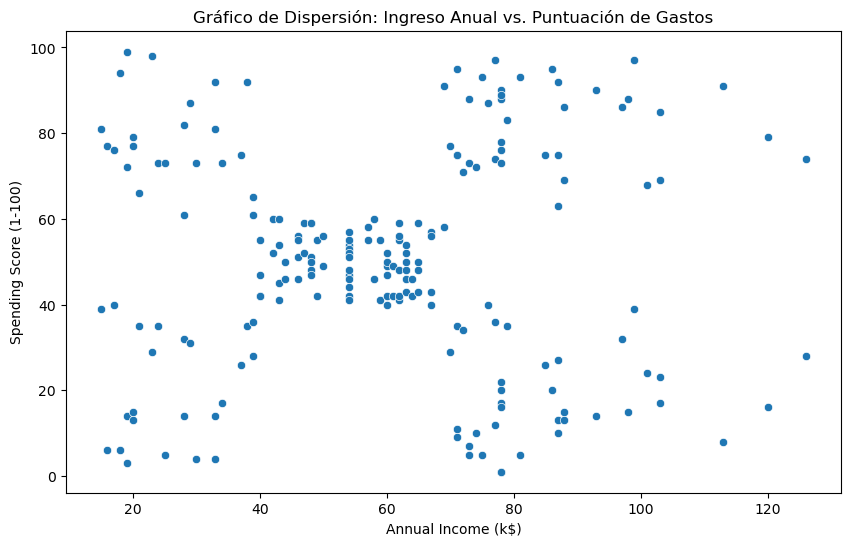

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_filtered, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Gráfico de Dispersión: Ingreso Anual vs. Puntuación de Gastos')
plt.show()

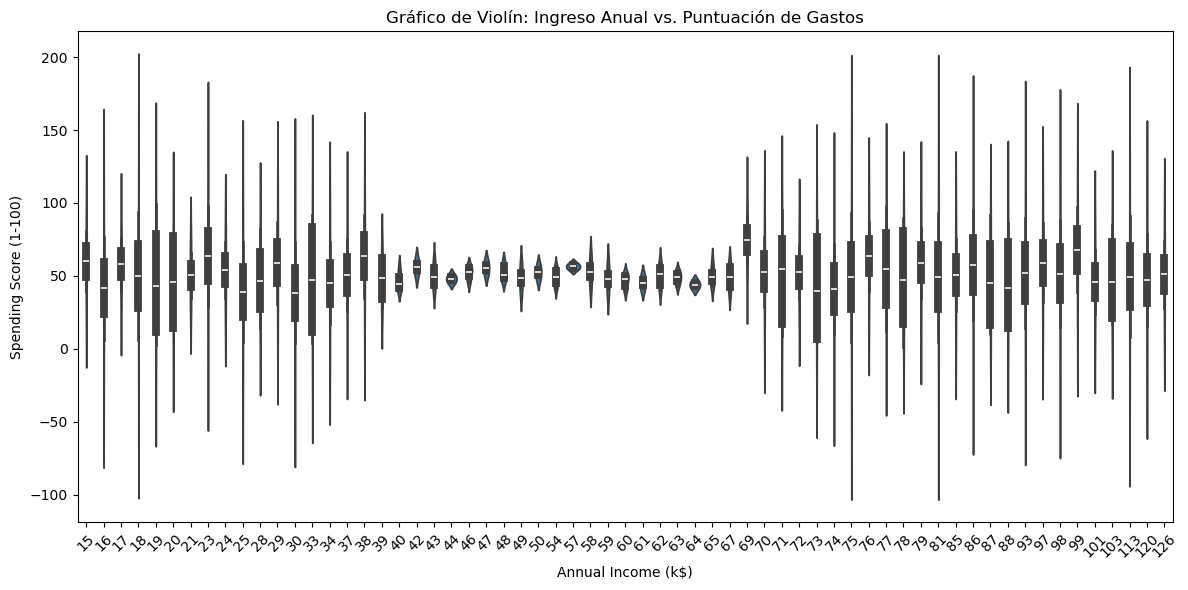

In [19]:
# Gráfico de violín con ajuste de etiquetas
plt.figure(figsize=(12, 6))
sns.violinplot(data=dataset_filtered, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Gráfico de Violín: Ingreso Anual vs. Puntuación de Gastos')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.tight_layout()  # Ajustar el layout
plt.show()

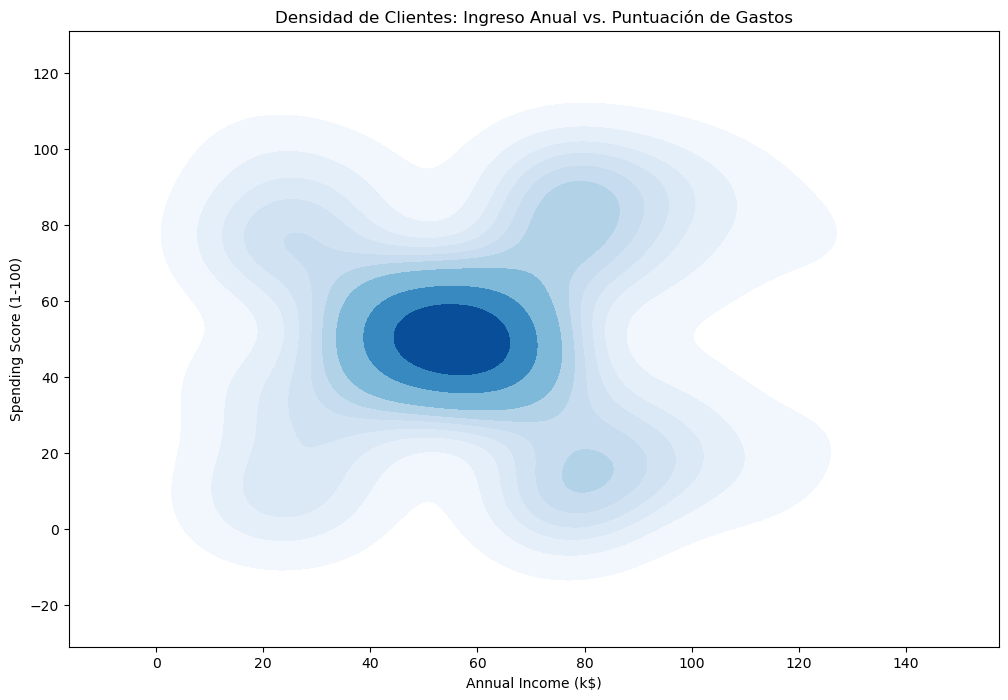

In [20]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=dataset_filtered, x='Annual Income (k$)', y='Spending Score (1-100)', cmap='Blues', fill=True)
plt.title('Densidad de Clientes: Ingreso Anual vs. Puntuación de Gastos')
plt.show()

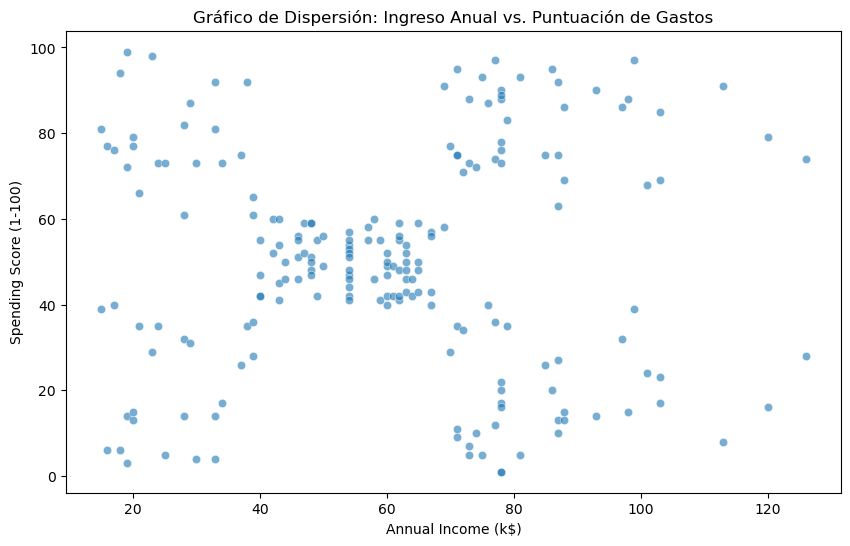

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_filtered, x='Annual Income (k$)', y='Spending Score (1-100)', alpha=0.6)
plt.title('Gráfico de Dispersión: Ingreso Anual vs. Puntuación de Gastos')
plt.show()

##K-MEANS

In [22]:
# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(dataset_filtered[['Annual Income (k$)', 'Spending Score (1-100)']])

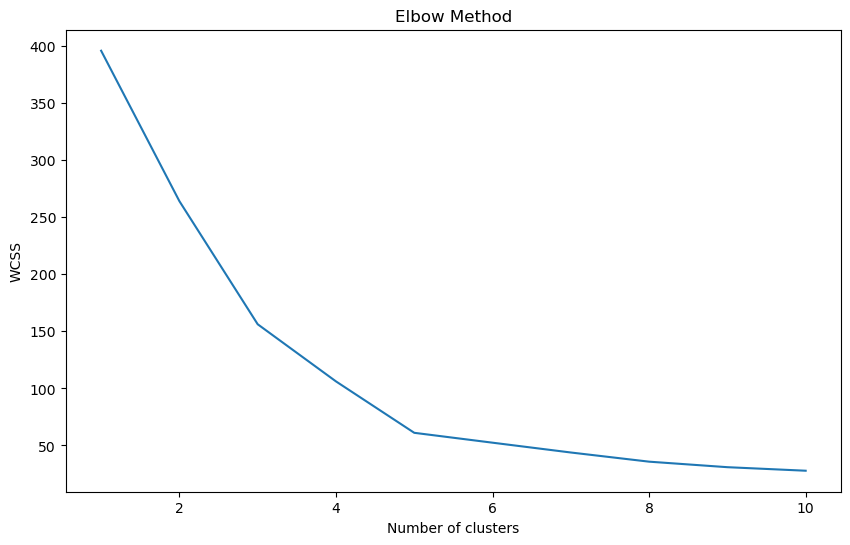

In [23]:
# Determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [25]:
# Evaluar el modelo
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.56


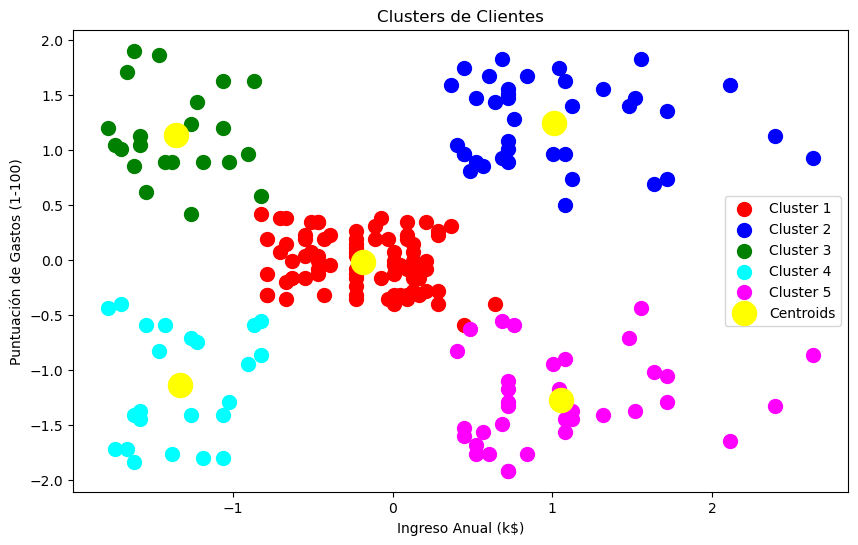

In [26]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gastos (1-100)')
plt.legend()
plt.show()

In [27]:
# Calcular métricas de evaluación para K-means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, y_kmeans))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, y_kmeans))
print("Inercia (suma de cuadrados dentro de los Clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, y_kmeans))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.5599199830769206
Índice de Calinski-Harabasz: 264.5351431780912
Inercia (suma de cuadrados dentro de los Clusters): 61.08666097712003
Davies-Bouldin Index: 0.5662109004011009


##hierarchical clustering

In [28]:
# Clustering jerárquico sin el argumento affinity (para el método ward)  
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')  
y_hc = hc.fit_predict(X)

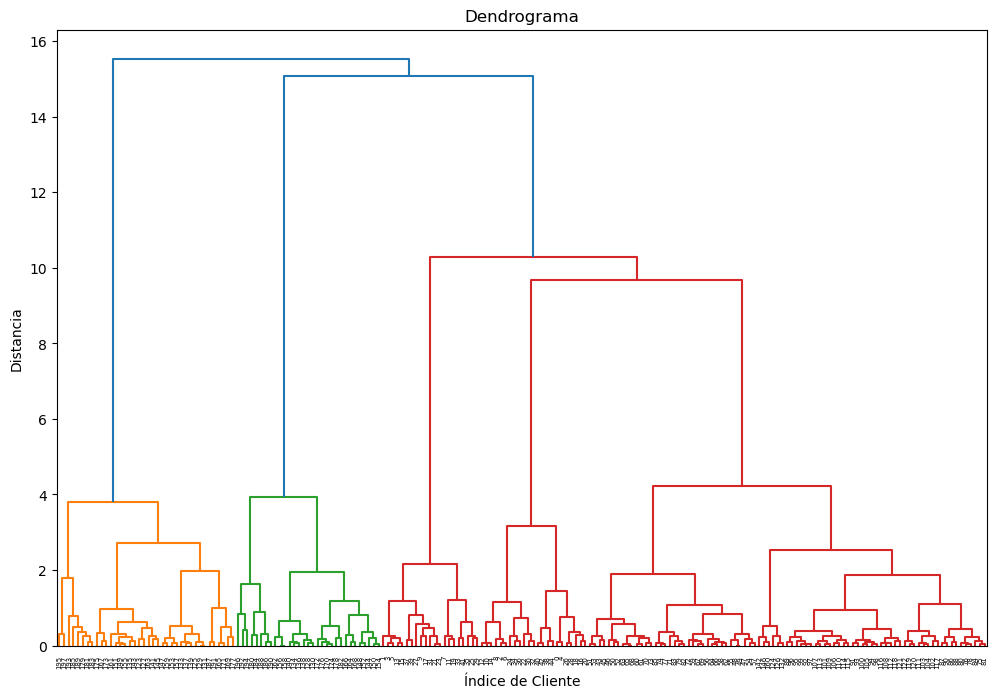

In [29]:
# Dendrograma  
plt.figure(figsize=(12, 8))  
Z = linkage(X, method='ward')  
dendrogram(Z)  
plt.title('Dendrograma')  
plt.xlabel('Índice de Cliente')  
plt.ylabel('Distancia')  
plt.show() 

In [30]:
# Evaluar el clustering jerárquico  
silhouette_avg_hc = silhouette_score(X, y_hc)  
print(f'Silhouette Score (Hierarchical Clustering): {silhouette_avg_hc:.2f}') 

Silhouette Score (Hierarchical Clustering): 0.56


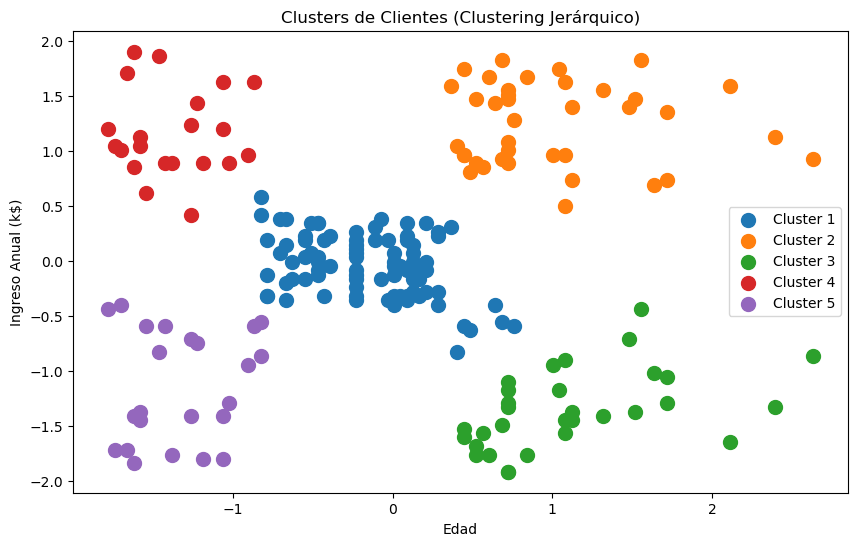

In [31]:
# Visualizar los resultados del clustering jerárquico  
plt.figure(figsize=(10, 6))  
for i in range(5):  
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s=100, label=f'Cluster {i+1}')  
plt.title('Clusters de Clientes (Clustering Jerárquico)')  
plt.xlabel('Edad')  
plt.ylabel('Ingreso Anual (k$)')  
plt.legend()  
plt.show()  

In [32]:
hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
      dtype=int64)

In [33]:
# Define colores para cada clúster  
colores = ['red', 'green', 'cyan', 'blue', 'yellow']  # Asegúrate de tener suficientes colores para tus clústeres  
asignar = [colores[row] for row in labels_hier] 

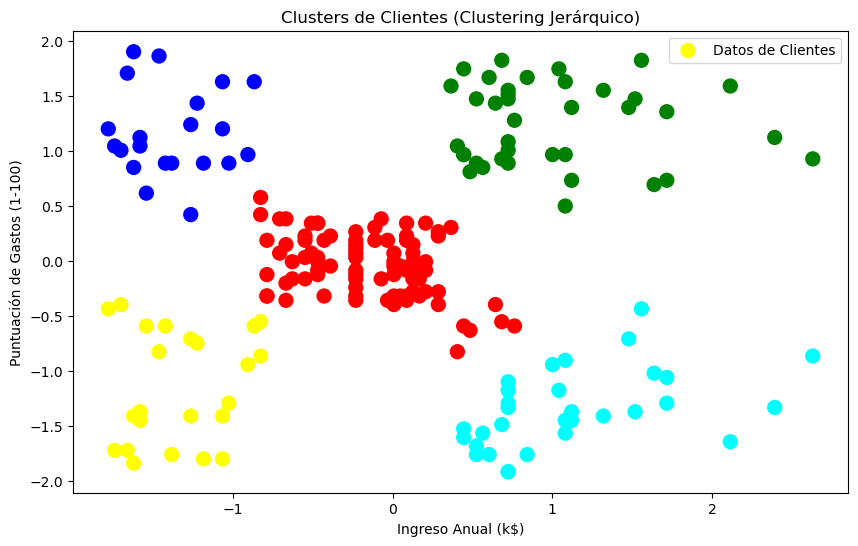

In [34]:
# Visualizar los resultados del clustering jerárquico  
plt.figure(figsize=(10, 6))  
plt.scatter(X[:, 0], X[:, 1], s=100, c=asignar, label='Datos de Clientes')  # Asignar colores a los puntos según el cluster  
plt.title('Clusters de Clientes (Clustering Jerárquico)')  
plt.xlabel('Ingreso Anual (k$)')  
plt.ylabel('Puntuación de Gastos (1-100)')  
plt.legend()  
plt.show()

In [35]:
# Evaluar el clustering jerárquico con métricas  
silhouette_avg_hc = silhouette_score(X, labels_hier)  
calinski_harabasz_hc = metrics.calinski_harabasz_score(X, labels_hier)  
davies_bouldin_hc = metrics.davies_bouldin_score(X, labels_hier)  

In [36]:
print("Medidas de calidad para el Clustering Jerárquico:")  
print(f"Puntaje de Silueta: {silhouette_avg_hc:.2f}")  
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_hc:.2f}")  
print(f"Índice de Davies-Bouldin: {davies_bouldin_hc:.2f}")  

Medidas de calidad para el Clustering Jerárquico:
Puntaje de Silueta: 0.56
Índice de Calinski-Harabasz: 258.19
Índice de Davies-Bouldin: 0.57


In [37]:
# Crear un DataFrame para un análisis posterior  
df = pd.DataFrame(X, columns=['Ingreso Anual', 'Puntuación de Gastos'])  
df['Cluster Hierárquico'] = labels_hier  


In [38]:
# Resumir datos  
cluster_summary_hc = df.groupby('Cluster Hierárquico').mean()  
print(cluster_summary_hc)  # Esta línea muestra las estadísticas descriptivas por clúster  

                     Ingreso Anual  Puntuación de Gastos
Cluster Hierárquico                                     
0                        -0.157949             -0.041569
1                         1.009899              1.242450
2                         1.115584             -1.350408
3                        -1.378144              1.162329
4                        -1.330113             -1.140262


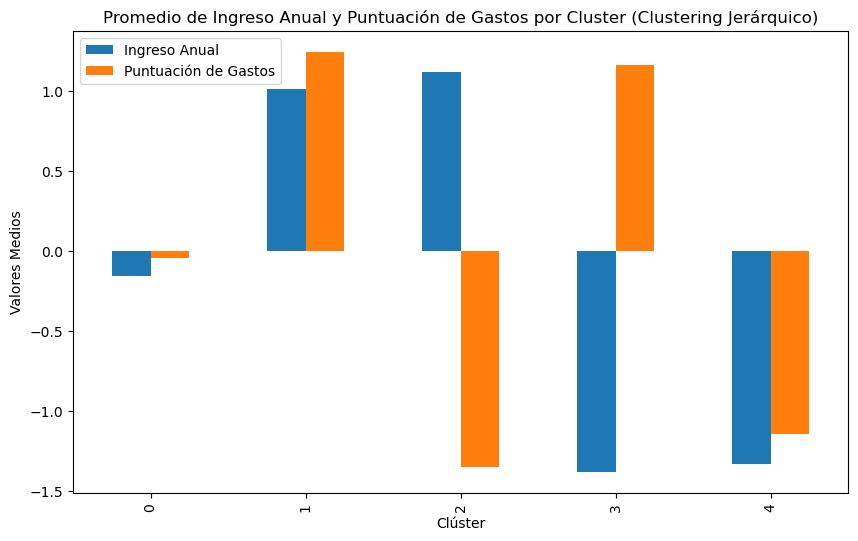

In [39]:
# Visualizar medias por clúster  
cluster_summary_hc.plot(kind='bar', figsize=(10, 6))  
plt.title('Promedio de Ingreso Anual y Puntuación de Gastos por Cluster (Clustering Jerárquico)')  
plt.ylabel('Valores Medios')  
plt.xlabel('Clúster')  # Puedes añadir esta línea para etiquetar el eje X  
plt.show() 